<a href="https://colab.research.google.com/github/aleeofficertraining/Data-Analytics-201/blob/main/Capstone_alee_01_24_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CDC 2021 National Youth Tobacco Survey
# 201 Data Analytics - Final Capstone Project Jan 24, 2023
# see separate Powerpoint slides.

In [ ]:
#================
# IMPORT PACKAGES
#================
import pandas as pd
# library does data manipulation and analysis
import numpy as np
import matplotlib.pyplot as plt
# library creates charts
import seaborn as sns
#more charts and graphs
!pip install plotly
!pip install cufflinks
import plotly.express as px
import plotly.offline as pyo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sns.set()
#Apply the default seaborn theme, scaling, and color palette.

In [ ]:
pip install tabulate
#used for table 8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#=============
# GET RAW DATA
#=============
# Original 2021 file was excel format. Changed to csv format.
# Source: https://www.cdc.gov/tobacco/data_statistics/surveys/nyts/index.htm  
#  I was originally working within Google colabs df = pd.read_csv(r'/content/nyts2021_cdcNYTS.csv')
# now I have to share to turn in the project in github.  the file is too large to upload in github.
from google.colab import files
uploaded = files.upload()


Saving nyts2021.csv to nyts2021 (1).csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['nyts2021.csv'])) # Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (624,625,626,671,688,690,702,711,724,730,745,779,781,791,804,829,838,851,870,879,892,913,922,935,949,958,971,983,992,1005,1017,1026,1039,1060,1073,1085,1094,1107,1120,1129,1142,1155,1164,1177) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df2.head()
#first five rows

,StudentLoginID,Location,QN1,QN2,QN3,QN4A,QN4B,QN4C,QN4D,QN4E,...,CBIDIS,CHTP,CPOUCH,psu,stratum,hsms,finwgt,v_stratum,v_stratum2,psu2
0,153749,In a school building/classroom,3.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,...,2.0,2.0,2.0,16452,BR3,MS,262.047226,103,103,16452
1,153750,In a school building/classroom,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,16452,BR3,MS,345.984971,103,103,16452
2,153752,In a school building/classroom,4.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,...,2.0,2.0,2.0,16452,BR3,MS,262.047226,103,103,16452
3,153753,In a school building/classroom,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,16452,BR3,MS,369.050636,103,103,16452
4,153754,In a school building/classroom,3.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,16452,BR3,MS,262.047226,103,103,16452


In [ ]:
df2.tail()
#last 5 rows

,StudentLoginID,Location,QN1,QN2,QN3,QN4A,QN4B,QN4C,QN4D,QN4E,...,CBIDIS,CHTP,CPOUCH,psu,stratum,hsms,finwgt,v_stratum,v_stratum2,psu2
20408,164198,In a school building/classroom,9.0,1.0,7.0,1.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,786771,HR1,HS,546.786234,201,201,786771
20409,164199,In a school building/classroom,10.0,2.0,7.0,1.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,786771,HR1,HS,651.521383,201,201,786771
20410,164201,In a school building/classroom,NaN,1.0,7.0,1.0,NaN,NaN,NaN,NaN,...,2.0,1.0,2.0,786771,HR1,HS,546.786234,201,201,786771
20411,164202,In a school building/classroom,10.0,1.0,7.0,1.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,786771,HR1,HS,546.786234,201,201,786771
20412,164209,In a school building/classroom,10.0,1.0,7.0,NaN,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,786771,HR1,HS,283.172134,201,201,786771


In [ ]:
df2.shape
#very large dataset

(20413, 1334)

In [ ]:
df2.info()
# too large to show details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20413 entries, 0 to 20412
Columns: 1334 entries, StudentLoginID to psu2
dtypes: float64(657), int64(5), object(672)
memory usage: 207.8+ MB


In [ ]:
df2.columns()
# too large to show details, but looks like most are float values and object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20413 entries, 0 to 20412
Columns: 1334 entries, StudentLoginID to psu2
dtypes: float64(657), int64(5), object(672)
memory usage: 207.8+ MB


In [ ]:
#====================================
#ANALYZE SURVEY QUESTIONS OF INTEREST
#====================================

# After reviewing the website with all survey questions, I decided to analyze the subset of questions below.
subset1 = df2[['StudentLoginID', 'Location', 'QN1', 'QN2', 'QN6', 'QN33A', 'QN35']]
subset1

,StudentLoginID,Location,QN1,QN2,QN6,QN33A,QN35
0,153749,In a school building/classroom,3.0,2.0,2.0,2.0,2.0
1,153750,In a school building/classroom,4.0,1.0,2.0,2.0,2.0
2,153752,In a school building/classroom,4.0,2.0,2.0,2.0,2.0
3,153753,In a school building/classroom,4.0,2.0,2.0,2.0,2.0
4,153754,In a school building/classroom,3.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
20408,164198,In a school building/classroom,9.0,1.0,1.0,2.0,1.0
20409,164199,In a school building/classroom,10.0,2.0,1.0,2.0,2.0
20410,164201,In a school building/classroom,NaN,1.0,2.0,2.0,2.0
20411,164202,In a school building/classroom,10.0,1.0,2.0,2.0,1.0


In [ ]:
# Codelist from online survey.  Select questions are quoted below.
# QN1: How old are you?  N = Not Answered, 1 = 9 yrs old, 2 = 10 yrs old, 3 = 11 yrs old, 4 = 12 yrs old, 5 = 13 yrs old, 6 = 14 yrs old, 7 = 15 yrs old, 
#                        8 = 16 yrs old, 9 = 17 yrs old, 10 = 18 yrs old , 11 = 19 yrs and older
# QN2: What is your sex?   N = Not answered, Z = Not displayed, 1 = Male, 2 = Female

# QN6: Have you ever used an e-cigarette even once or twice?  N = Not answered, Z = Not displayed, 1 = Yes, 2 = No
# QN33A: Have you ever vaped any of the following substances (even once)? Marijuana (also called pot, weed, or cannabis), 
#         including THC, THC concentrates, hash oil, or waxes? 
#                         N = Not answered, Z = Not displayed, 1 = Yes, 2 = No, 3 = Don't know
# QN35: Have you ever smoked a cigarette, even one or two puffs? N = Not answered, Z = Not displayed, 1 = Yes, 2 = No

In [ ]:
#============================
#  AGE VALUES - FOCUS 12-18YO
#============================
# Convert age QN1 =1.0, 2.0, and 3.0 values, to be in same age group as QN4.0.  This combines the ages into 12yo.
# Convert age QN11.0 values, to be in same age group as QN10.0.  This combines the ages into 18yo.
subset1.loc[subset1['QN1'] == 1.0, 'QN1'] = 4.0
subset1.loc[subset1['QN1'] == 2.0, 'QN1'] = 4.0
subset1.loc[subset1['QN1'] == 3.0, 'QN1'] = 4.0
subset1.loc[subset1['QN1'] == 11.0, 'QN1'] = 10.0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
subset1.groupby(['QN1'])['QN1'].count()

QN1
4.0     4633
5.0     3308
6.0     3079
7.0     2872
8.0     2562
9.0     2504
10.0    1386
Name: QN1, dtype: int64

In [ ]:
#==============================================
#  PART 1 - TOTAL NO'S       EACH GRADE
#  PART 2 - AT LEAST 1 YES   EACH GRADE
#  PART 3 - TOTAL STUDENTS   EACH GRADE
#  PART 4 - PERCENT STUDENTS EACH GRADE

In [ ]:
#==============================================
#  PART 1 - TOTAL NO'S
#  STUDENTS WITH NO USAGE ENTIRELY - 
#  ALL 3 SURVEY QNS ARE ZERO. QN6=QN33A=QN35=2.0
#==============================================
All_No = subset1.loc[(subset1['QN6'] == 2.0) & (subset1['QN33A'] == 2.0) & (subset1['QN35'] == 2.0)]
print(All_No)

       StudentLoginID                        Location   QN1  QN2  QN6  QN33A  \
0              153749  In a school building/classroom   4.0  2.0  2.0    2.0   
1              153750  In a school building/classroom   4.0  1.0  2.0    2.0   
2              153752  In a school building/classroom   4.0  2.0  2.0    2.0   
3              153753  In a school building/classroom   4.0  2.0  2.0    2.0   
5              153756  In a school building/classroom   4.0  1.0  2.0    2.0   
...               ...                             ...   ...  ...  ...    ...   
20401          164168  In a school building/classroom  10.0  2.0  2.0    2.0   
20403          164175      At home (virtual learning)  10.0  1.0  2.0    2.0   
20404          164191  In a school building/classroom   9.0  1.0  2.0    2.0   
20407          164197  In a school building/classroom  10.0  2.0  2.0    2.0   
20410          164201  In a school building/classroom   NaN  1.0  2.0    2.0   

       QN35  
0       2.0  
1       2.0

In [ ]:
All_No.groupby(['QN1'])['QN1'].count()
#Total No's for each 12-18 yo age group

QN1
4.0     4020
5.0     2749
6.0     2344
7.0     1988
8.0     1540
9.0     1412
10.0     710
Name: QN1, dtype: int64

In [ ]:
All_No.describe()
# descriptive statistics
# mean age is a little over 14 years old (QN1=6.0)
# mean sex is 1.5 which means males:females are 1:1 (QN2)

,StudentLoginID,QN1,QN2,QN6,QN33A,QN35
count,14800.000000,14763.000000,14735.000000,14800.0,14800.0,14800.0
mean,144091.862905,6.091784,1.482525,2.0,2.0,2.0
std,39827.243406,1.857267,0.499711,0.0,0.0,0.0
min,77475.000000,4.000000,1.000000,2.0,2.0,2.0
25%,109355.500000,4.000000,1.000000,2.0,2.0,2.0
50%,143898.500000,6.000000,1.000000,2.0,2.0,2.0
75%,178979.250000,7.000000,2.000000,2.0,2.0,2.0
max,219105.000000,10.000000,2.000000,2.0,2.0,2.0


In [ ]:
#identify duplicate rows in All_No
duplicateRows_All_No = All_No[All_No.duplicated(['StudentLoginID'])]

#view duplicate rows
duplicateRows_All_No

#there are zero duplicate rows

,StudentLoginID,Location,QN1,QN2,QN6,QN33A,QN35


In [ ]:
#===========
# END PART 1
#===========

In [ ]:
#=========================
#  PART 2 - AT LEAST 1 YES
#=========================
#12 year olds examined where QN6 = QN33A = QN35 = 1.0
Twelve_QN6Y = subset1.query('QN1 == 4.0').query('QN6 == 1.0').filter(['StudentLoginID']) #query filter

In [ ]:
Twelve_QN33AY = subset1.query('QN1 == 4.0').query('QN33A == 1.0').filter(['StudentLoginID']) #query filter

In [ ]:
Twelve_QN35Y = subset1.query('QN1 == 4.0').query('QN35 == 1.0').filter(['StudentLoginID']) #query filter

In [ ]:
Twelve_TotalY = pd.concat([Twelve_QN6Y, Twelve_QN33AY, Twelve_QN35Y])
Twelve_TotalY

#concatenate

,StudentLoginID
26,153815
53,85656
72,85735
164,110572
349,78137
...,...
19829,77473
19834,77480
19840,77490
19844,77551


In [ ]:
duplicateRows12Y = Twelve_TotalY[Twelve_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRows12Y

,StudentLoginID
72,85735
646,178594
1269,120306
1288,120421
1673,173863
...,...
19206,148974
19304,120618
19305,120646
19309,120653


In [ ]:
474-131

343

In [ ]:
Twelve_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 12YO - AT LEAST 1 YES

,StudentLoginID
26,153815
53,85656
72,85735
164,110572
349,78137
...,...
19829,77473
19834,77480
19840,77490
19844,77551


In [ ]:
#  END 12 YO AT LEAST 1 YES
#=====================
#  13YO AT LEAST 1 YES
#=====================
#Twelve_QN6Y = subset1.query('QN1 == 4.0').query('QN6 == 1.0').filter(['StudentLoginID'])
#Twelve_QN33AY = subset1.query('QN1 == 4.0').query('QN33A == 1.0').filter(['StudentLoginID'])
#Twelve_QN35Y = subset1.query('QN1 == 4.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#Twelve_TotalY = pd.concat([Twelve_QN6Y, Twelve_QN33AY, Twelve_QN35Y])
#Twelve_TotalY

#duplicateRows12Y = Twelve_TotalY[Twelve_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
#duplicateRows12Y

# do math subtract 1 row from another to QC check

#Twelve_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 12YO - AT LEAST 1 YES

In [ ]:
#Thirteen_QN6Y = subset1.query('QN1 == 5.0').query('QN6 == 1.0').filter(['StudentLoginID'])
#Thirteen_QN33AY = subset1.query('QN1 == 5.0').query('QN33A == 1.0').filter(['StudentLoginID'])
#Thirteen_QN35Y = subset1.query('QN1 == 5.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#Thirteen_TotalY = pd.concat([Thirteen_QN6Y, Thirteen_QN33AY, Thirteen_QN35Y])
#Thirteen_TotalY

#duplicateRows13Y = Thirteen_TotalY[Thirteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
#duplicateRows13Y

# do math subtract 1 row from another to QC check

#Thirteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 13YO - AT LEAST 1 YES

In [ ]:
Thirteen_QN6Y = subset1.query('QN1 == 5.0').query('QN6 == 1.0').filter(['StudentLoginID'])
Thirteen_QN33AY = subset1.query('QN1 == 5.0').query('QN33A == 1.0').filter(['StudentLoginID'])
Thirteen_QN35Y = subset1.query('QN1 == 5.0').query('QN35 == 1.0').filter(['StudentLoginID'])
# query filter

In [ ]:
Thirteen_TotalY = pd.concat([Thirteen_QN6Y, Thirteen_QN33AY, Thirteen_QN35Y])
Thirteen_TotalY
#concatenate

,StudentLoginID
79,85774
189,110697
346,78134
510,104434
512,104436
...,...
19543,192907
19849,118551
19925,82660
19996,164722


In [ ]:
duplicateRows13Y = Thirteen_TotalY[Thirteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRows13Y

# do math subtract 1 row from another to QC check

#Thirteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 13YO - AT LEAST 1 YES

,StudentLoginID
346,78134
522,104475
524,104478
532,104489
620,178528
...,...
19319,120669
19449,91694
19543,192907
19925,82660


In [ ]:
592-186

406

In [ ]:
Thirteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 13YO - AT LEAST 1 YES

,StudentLoginID
79,85774
189,110697
346,78134
510,104434
512,104436
...,...
19235,149064
19517,192837
19532,192890
19849,118551


In [ ]:
#  END 13 YO AT LEAST 1 YES
#=======================================
#=====================
#  14YO AT LEAST 1 YES
#=====================
#Fourteen_QN6Y = subset1.query('QN1 == 6.0').query('QN6 == 1.0').filter(['StudentLoginID'])
#Fourteen_QN33AY = subset1.query('QN1 == 6.0').query('QN33A == 1.0').filter(['StudentLoginID'])
#Fourteen_QN35Y = subset1.query('QN1 == 6.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#Fourteen_TotalY = pd.concat([Fourteen_QN6Y, Fourteen_QN33AY, Fourteen_QN35Y])
#Fourteen_TotalY

#duplicateRows14Y = Fourteen_TotalY[Fourteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
#duplicateRows14Y

# do math subtract 1 row from another to QC check

#Fourteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 14YO - AT LEAST 1 YES

In [ ]:
Fourteen_QN6Y = subset1.query('QN1 == 6.0').query('QN6 == 1.0').filter(['StudentLoginID'])
Fourteen_QN33AY = subset1.query('QN1 == 6.0').query('QN33A == 1.0').filter(['StudentLoginID'])
Fourteen_QN35Y = subset1.query('QN1 == 6.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#query filter

In [ ]:
Fourteen_TotalY = pd.concat([Fourteen_QN6Y, Fourteen_QN33AY, Fourteen_QN35Y])
Fourteen_TotalY
#concatenate

,StudentLoginID
107,85942
111,85954
120,85974
221,121237
223,121245
...,...
19877,108790
19880,108794
20136,117938
20159,117831


In [ ]:
duplicateRows14Y = Fourteen_TotalY[Fourteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRows14Y

# do math subtract 1 row from another to QC check

,StudentLoginID
221,121237
223,121245
224,121253
225,121261
306,79284
...,...
19735,181586
19858,118560
19877,108790
19880,108794


In [ ]:
936-319

617

In [ ]:
Fourteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 14YO - AT LEAST 1 YES

,StudentLoginID
107,85942
111,85954
120,85974
221,121237
223,121245
...,...
19124,179013
19343,120770
19498,192783
20159,117831


In [ ]:
#  END 14 YO AT LEAST 1 YES
#===========================
#=====================
#  15YO AT LEAST 1 YES
#=====================
#Fifteen_QN6Y = subset1.query('QN1 == 7.0').query('QN6 == 1.0').filter(['StudentLoginID'])
#Fifteen_QN33AY = subset1.query('QN1 == 7.0').query('QN33A == 1.0').filter(['StudentLoginID'])
#Fifteen_QN35Y = subset1.query('QN1 == 7.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#Fifteen_TotalY = pd.concat([Fifteen_QN6Y, Fifteen_QN33AY, Fifteen_QN35Y])
#Fifteen_TotalY

#duplicateRows15Y = Fifteen_TotalY[Fifteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
#duplicateRows15Y

# do math subtract 1 row from another to QC check

#Fifteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 15YO - AT LEAST 1 YES

In [ ]:
Fifteen_QN6Y = subset1.query('QN1 == 7.0').query('QN6 == 1.0').filter(['StudentLoginID'])
Fifteen_QN33AY = subset1.query('QN1 == 7.0').query('QN33A == 1.0').filter(['StudentLoginID'])
Fifteen_QN35Y = subset1.query('QN1 == 7.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#query filter

In [ ]:
Fifteen_TotalY = pd.concat([Fifteen_QN6Y, Fifteen_QN33AY, Fifteen_QN35Y])
Fifteen_TotalY
#concatenate

,StudentLoginID
110,85950
121,121027
206,121173
211,121181
228,121268
...,...
20320,163805
20344,163948
20348,163956
20349,163957


In [ ]:
duplicateRows15Y = Fifteen_TotalY[Fifteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRows15Y

# do math subtract 1 row from another to QC check

,StudentLoginID
110,85950
121,121027
206,121173
315,79350
395,109307
...,...
19893,108864
20320,163805
20348,163956
20349,163957


In [ ]:
1237-453

784

In [ ]:
Fifteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 15YO - AT LEAST 1 YES

,StudentLoginID
110,85950
121,121027
206,121173
211,121181
228,121268
...,...
19362,193632
19559,192952
19571,215706
19691,149941


In [ ]:
#  END 15 YO AT LEAST 1 YES
#=======================================
#=====================
#  16YO AT LEAST 1 YES
#=====================
#Sixteen_QN6Y = subset1.query('QN1 == 8.0').query('QN6 == 1.0').filter(['StudentLoginID'])
#Sixteen_QN33AY = subset1.query('QN1 == 8.0').query('QN33A == 1.0').filter(['StudentLoginID'])
#Sixteen_QN35Y = subset1.query('QN1 == 8.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#Sixteen_TotalY = pd.concat([Sixteen_QN6Y, Sixteen_QN33AY, Sixteen_QN35Y])
#Sixteen_TotalY

#duplicateRows16Y = Sixteen_TotalY[Sixteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
#duplicateRows16Y

# do math subtract 1 row from another to QC check

#Sixteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 16YO - AT LEAST 1 YES

In [ ]:
Sixteen_QN6Y = subset1.query('QN1 == 8.0').query('QN6 == 1.0').filter(['StudentLoginID'])
Sixteen_QN33AY = subset1.query('QN1 == 8.0').query('QN33A == 1.0').filter(['StudentLoginID'])
Sixteen_QN35Y = subset1.query('QN1 == 8.0').query('QN35 == 1.0').filter(['StudentLoginID'])
# query filter

In [ ]:
Sixteen_TotalY = pd.concat([Sixteen_QN6Y, Sixteen_QN33AY, Sixteen_QN35Y])
Sixteen_TotalY
#concatenate

,StudentLoginID
135,121069
200,121160
215,121193
234,121338
236,121340
...,...
20274,159716
20295,159778
20365,164027
20373,164042


In [ ]:
duplicateRows16Y = Sixteen_TotalY[Sixteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRows16Y

# do math subtract 1 row from another to QC check

,StudentLoginID
135,121069
215,121193
258,121460
261,121468
270,121513
...,...
20240,159634
20274,159716
20295,159778
20365,164027


In [ ]:
1574-633

941

In [ ]:
Sixteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 16YO - AT LEAST 1 YES

,StudentLoginID
135,121069
200,121160
215,121193
234,121338
236,121340
...,...
19568,215701
19586,215841
19798,161029
19800,161032


In [ ]:
#  END 16 YO AT LEAST 1 YES
#=======================================
#=====================
#  17YO AT LEAST 1 YES
#=====================
#Seventeen_QN6Y = subset1.query('QN1 == 9.0').query('QN6 == 1.0').filter(['StudentLoginID'])
#Seventeen_QN33AY = subset1.query('QN1 == 9.0').query('QN33A == 1.0').filter(['StudentLoginID'])
#Seventeen_QN35Y = subset1.query('QN1 == 9.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#Seventeen_TotalY = pd.concat([Seventeen_QN6Y, Seventeen_QN33AY, Seventeen_QN35Y])
#Seventeen_TotalY

#duplicateRows17Y = Seventeen_TotalY[Seventeen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
#duplicateRows17Y

# do math subtract 1 row from another to QC check

#Seventeen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 17YO - AT LEAST 1 YES

In [ ]:
Seventeen_QN6Y = subset1.query('QN1 == 9.0').query('QN6 == 1.0').filter(['StudentLoginID'])
Seventeen_QN33AY = subset1.query('QN1 == 9.0').query('QN33A == 1.0').filter(['StudentLoginID'])
Seventeen_QN35Y = subset1.query('QN1 == 9.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#query filter

In [ ]:
Seventeen_TotalY = pd.concat([Seventeen_QN6Y, Seventeen_QN33AY, Seventeen_QN35Y])
Seventeen_TotalY
#concatenate

,StudentLoginID
278,121572
280,121576
281,121579
282,121580
316,79354
...,...
20378,164087
20386,164122
20395,164157
20402,164169


In [ ]:
duplicateRows17Y = Seventeen_TotalY[Seventeen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRows17Y

# do math subtract 1 row from another to QC check

,StudentLoginID
281,121579
282,121580
323,79412
327,79448
328,79454
...,...
20335,163897
20378,164087
20395,164157
20402,164169


In [ ]:
1740-727

1013

In [ ]:
Seventeen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 17YO - AT LEAST 1 YES

,StudentLoginID
278,121572
280,121576
281,121579
282,121580
316,79354
...,...
19395,193817
19618,217459
19620,217461
19626,217527


In [ ]:
#  END 17 YO AT LEAST 1 YES
#=======================================
#=====================
#  18YO AT LEAST 1 YES
#=====================
#Eighteen_QN6Y = subset1.query('QN1 == 10.0').query('QN6 == 1.0').filter(['StudentLoginID'])
#Eighteen_QN33AY = subset1.query('QN1 == 10.0').query('QN33A == 1.0').filter(['StudentLoginID'])
#Eighteen_QN35Y = subset1.query('QN1 == 10.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#Eighteen_TotalY = pd.concat([Eighteen_QN6Y, Eighteen_QN33AY, Eighteen_QN35Y])
#Eighteen_TotalY

#duplicateRows18Y = Eighteen_TotalY[Eighteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
#duplicateRows18Y

# do math subtract 1 row from another to QC check

#Eighteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 18YO - AT LEAST 1 YES

In [ ]:
Eighteen_QN6Y = subset1.query('QN1 == 10.0').query('QN6 == 1.0').filter(['StudentLoginID'])
Eighteen_QN33AY = subset1.query('QN1 == 10.0').query('QN33A == 1.0').filter(['StudentLoginID'])
Eighteen_QN35Y = subset1.query('QN1 == 10.0').query('QN35 == 1.0').filter(['StudentLoginID'])
#query filter

In [ ]:
Eighteen_TotalY = pd.concat([Eighteen_QN6Y, Eighteen_QN33AY, Eighteen_QN35Y])
Eighteen_TotalY
#concatenate

,StudentLoginID
259,121461
275,121567
283,121583
289,121596
321,79408
...,...
20394,164156
20396,164160
20405,164193
20411,164202


In [ ]:
duplicateRows18Y = Eighteen_TotalY[Eighteen_TotalY.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRows18Y

# do math subtract 1 row from another to QC check

,StudentLoginID
259,121461
275,121567
283,121583
321,79408
336,79474
...,...
20296,159779
20376,164079
20394,164156
20396,164160


In [ ]:
1036-436

600

In [ ]:
Eighteen_TotalY.drop_duplicates(subset='StudentLoginID', keep='first')
# 18YO - AT LEAST 1 YES

,StudentLoginID
259,121461
275,121567
283,121583
289,121596
321,79408
...,...
18367,148714
19716,163469
19754,181739
20405,164193


In [ ]:
# END OF 18YO AT LEAST 1 YES

In [ ]:
#=============================================
# TOTAL STUDENTS EACH GRADE - SEE ABOVE TOTALS
#=============================================
# AGE;  TOTAL NO; AT LEAST 1YES; TOTAL STUDENTS EACH AGE
# 12, 4020, 343, 4363
# 13, 2749, 406, 3155
# 14, 2344, 617, 2961
# 15, 1988, 784, 2772
# 16, 1540, 941, 2481
# 17, 1412, 1013, 2425
# 18, 710, 600, 1310

In [ ]:
4363+3155+2961+2772+2481+2425+1310

19467

In [ ]:
#==========
# PIE CHART
#==========
# Add up all the totals from prior cells for each age
ages = {'Age_of_respondents': ['12 yo', '13 yo', '14 yo', '15 yo', '16 yo', '17 yo', '18 yo'], 
       'Totals': [4363, 3155, 2961, 2772, 2481, 2425, 1310]}
ages = pd.DataFrame(ages)
ages
#create a table using the total calculations


,Age_of_respondents,Totals
0,12 yo,4363
1,13 yo,3155
2,14 yo,2961
3,15 yo,2772
4,16 yo,2481
5,17 yo,2425
6,18 yo,1310


In [ ]:
#labels for pie chart
newlabels_pie = ages.Age_of_respondents
newcounts_pie = ages.Totals

newexplode_pie = [0, 0, 0, 0, 0, 0, 0]

In [ ]:
total_of_counts = ages.Totals.sum()
total_of_counts

19467

In [ ]:
# To Add Values and Percentage we have to do the reverse calculation of autopct function
def your_autopct_format(prct_value):
  print(prct_value)
  return '{:.1f}%\n{:.0f}'.format(prct_value, total_of_counts*prct_value/100)

22.412288188934326
16.20691418647766
15.210355818271637
14.239482581615448
12.744644284248352
12.456978112459183
6.729336827993393


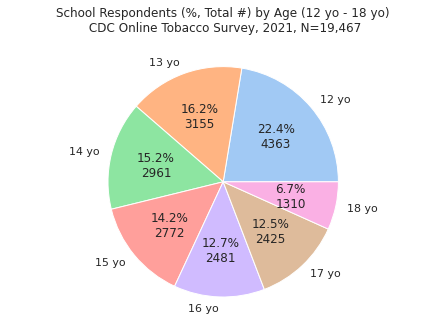

In [ ]:
# continued pie chart information.  Pastel colors are readable.
pal_ = list(sns.color_palette(palette='pastel', n_colors=len(ages)).as_hex())

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

ax.pie(newcounts_pie, labels = newlabels_pie, autopct = your_autopct_format, colors = pal_, explode = newexplode_pie)   #If I wanted explode, I would add to parentheses as , explode = newexplode_pie
plt.title('School Respondents (%, Total #) by Age (12 yo - 18 yo)' '\n CDC Online Tobacco Survey, 2021, N=19,467')
plt.show()

Text(0.5, 1.0, 'Tobacco Usage for 12-18 yo, CDC Online National Tobacco Survey 2021')

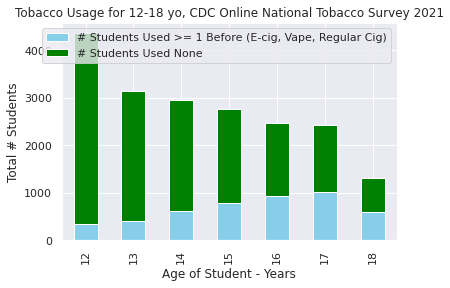

In [ ]:
# create DataFrame for stacked bar chart
df = pd.DataFrame({'# Students Used >= 1 Before (E-cig, Vape, Regular Cig)': [343, 406, 617, 784, 941, 1013, 600], 
                   '# Students Used None': [4020, 2749, 2344, 1988, 1540, 1412, 710]}, index=[12, 13, 14, 15, 16, 17, 18])
# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['skyblue', 'green'])
# labels for x & y axis
plt.xlabel('Age of Student - Years')
plt.ylabel('Total # Students')
# title of plot
plt.title('Tobacco Usage for 12-18 yo, CDC Online National Tobacco Survey 2021')

In [ ]:
#The following comes from reading the online report and looking at the survey:
#•	Influences:  At least 1 influence nearby (friend, family).  Or took self-initiative (relieve anxiety, stress) 

In [ ]:
#'Years' 12, 13, 14, 15, 16, 17, 18
#{'# Students Used >= 1 Before (E-cig, Vape, Regular Cig)': [343, 406, 617, 784, 941, 1013, 600], 
#                  '# Students Used None': [4020, 2749, 2344, 1988, 1540, 1412, 710]})

Usages = {
    'Ages':[12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18],
    '# Students Usage Range' :[343, 4020, 406, 2749, 617, 2344, 784, 1988, 941, 1540, 1013, 1412, 600, 710]
          }
Tobacco_Usage = pd.DataFrame(Usages)
print(Tobacco_Usage)

    Ages  # Students Usage Range
0     12                     343
1     12                    4020
2     13                     406
3     13                    2749
4     14                     617
5     14                    2344
6     15                     784
7     15                    1988
8     16                     941
9     16                    1540
10    17                    1013
11    17                    1412
12    18                     600
13    18                     710


In [ ]:
# Using DataFrame.agg() Method to calculate percentages
Sum_Usage = Tobacco_Usage.groupby(['Ages', '# Students Usage Range']).agg({'# Students Usage Range': 'sum'})
print(Sum_Usage)

                             # Students Usage Range
Ages # Students Usage Range                        
12   343                                        343
     4020                                      4020
13   406                                        406
     2749                                      2749
14   617                                        617
     2344                                      2344
15   784                                        784
     1988                                      1988
16   941                                        941
     1540                                      1540
17   1013                                      1013
     1412                                      1412
18   600                                        600
     710                                        710


In [ ]:
# Percentage by lambda and DataFrame.apply() method.
Percent_Usage = Sum_Usage.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(Percent_Usage)
 
#•	No usage for majority (green) from 92.1% in 12 yo, 
#      to 54.2% in 18 yo
#•	Steady increase in tobacco use with age (blue) 
#      from 7.9% in 12 yo,
#      to 45.8% in 18 yo

                             # Students Usage Range
Ages # Students Usage Range                        
12   343                                   7.861563
     4020                                 92.138437
13   406                                  12.868463
     2749                                 87.131537
14   617                                  20.837555
     2344                                 79.162445
15   784                                  28.282828
     1988                                 71.717172
16   941                                  37.928255
     1540                                 62.071745
17   1013                                 41.773196
     1412                                 58.226804
18   600                                  45.801527
     710                                  54.198473


In [ ]:
#=====================================
# SLIDE 7 TABLE OF ECIG, VAPE, REG CIG
# PART 1 - ECIG
# PART 2 - VAPE
# PART 3 - REG CIG
# PART 4 - PERCENTAGES NEEDED FOR TABLE
#=====================================
#===========================================================================
# PART 1 - ECIG
# E-cigarettes QN6 - At least 1 Yes (all years, all ages), All No (all ages)
#=========================================================================== 
EcigOnlySubset = subset1[['StudentLoginID', 'Location', 'QN1', 'QN6']]
EcigOnlySubset.dropna(inplace = True)
# remove blanks

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
EcigOnlySubset

,StudentLoginID,Location,QN1,QN6
0,153749,In a school building/classroom,4.0,2.0
1,153750,In a school building/classroom,4.0,2.0
2,153752,In a school building/classroom,4.0,2.0
3,153753,In a school building/classroom,4.0,2.0
5,153756,In a school building/classroom,4.0,2.0
...,...,...,...,...
20407,164197,In a school building/classroom,10.0,2.0
20408,164198,In a school building/classroom,9.0,1.0
20409,164199,In a school building/classroom,10.0,1.0
20411,164202,In a school building/classroom,10.0,2.0


In [ ]:
Ecig_No = EcigOnlySubset.loc[(EcigOnlySubset['QN6'] == 2.0)]
print(Ecig_No)

       StudentLoginID                        Location   QN1  QN6
0              153749  In a school building/classroom   4.0  2.0
1              153750  In a school building/classroom   4.0  2.0
2              153752  In a school building/classroom   4.0  2.0
3              153753  In a school building/classroom   4.0  2.0
5              153756  In a school building/classroom   4.0  2.0
...               ...                             ...   ...  ...
20403          164175      At home (virtual learning)  10.0  2.0
20404          164191  In a school building/classroom   9.0  2.0
20405          164193  In a school building/classroom  10.0  2.0
20407          164197  In a school building/classroom  10.0  2.0
20411          164202  In a school building/classroom  10.0  2.0

[15795 rows x 4 columns]


In [ ]:
duplicateRowsEcigNo = Ecig_No[Ecig_No.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRowsEcigNo

# no duplicates

,StudentLoginID,Location,QN1,QN6


In [ ]:
Ecig_Yes = EcigOnlySubset.loc[(EcigOnlySubset['QN6'] == 1.0)]
print(Ecig_Yes)

       StudentLoginID                        Location   QN1  QN6
26             153815  In a school building/classroom   4.0  1.0
53              85656  In a school building/classroom   4.0  1.0
72              85735  In a school building/classroom   4.0  1.0
107             85942  In a school building/classroom   6.0  1.0
110             85950  In a school building/classroom   7.0  1.0
...               ...                             ...   ...  ...
20402          164169  In a school building/classroom   9.0  1.0
20406          164194  In a school building/classroom   9.0  1.0
20408          164198  In a school building/classroom   9.0  1.0
20409          164199  In a school building/classroom  10.0  1.0
20412          164209  In a school building/classroom  10.0  1.0

[3553 rows x 4 columns]


In [ ]:
duplicateRowsEcigYes = Ecig_Yes[Ecig_Yes.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRowsEcigYes

# no duplicates

,StudentLoginID,Location,QN1,QN6


In [ ]:
#===========================================================================
# PART 2 - VAPE
# VAPE QN33A - At least 1 Yes (all years, all ages), All No (all ages)
#=========================================================================== 
#EcigOnlySubset = subset1[['StudentLoginID', 'Location', 'QN1', 'QN6']]
#EcigOnlySubset.dropna(inplace = True)
## Comment: remove blanks

#EcigOnlySubset



#Ecig_No = EcigOnlySubset.loc[(EcigOnlySubset['QN6'] == 2.0)]
#print(Ecig_No)


#duplicateRowsEcigNo = Ecig_No[Ecig_No.duplicated(['StudentLoginID'])]

##view duplicate rows in df5
#duplicateRowsEcigNo


#Ecig_Yes = EcigOnlySubset.loc[(EcigOnlySubset['QN6'] == 1.0)]
#print(Ecig_Yes)


#duplicateRowsEcigYes = Ecig_Yes[Ecig_Yes.duplicated(['StudentLoginID'])]

## Comment: view duplicate rows in df5
#duplicateRowsEcigYes


In [ ]:
#VapeOnlySubset = subset1[['StudentLoginID', 'Location', 'QN1', 'QN33A']]
#VapeOnlySubset.dropna(inplace = True)
## Comment: remove blanks

#VapeOnlySubset



#Vape_No = VapeOnlySubset.loc[(VapeOnlySubset['QN33A'] == 2.0)]
#print(Vape_No)


#duplicateRowsVapeNo = Vape_No[Vape_No.duplicated(['StudentLoginID'])]

##view duplicate rows in df5
#duplicateRowsVapeNo


#Vape_Yes = VapeOnlySubset.loc[(VapeOnlySubset['QN33A'] == 1.0)]
#print(Vape_Yes)


#duplicateRowsVapeYes = Vape_Yes[Vape_Yes.duplicated(['StudentLoginID'])]

## Comment: view duplicate rows
#duplicateRowsVapeYes


In [ ]:
VapeOnlySubset = subset1[['StudentLoginID', 'Location', 'QN1', 'QN33A']]
VapeOnlySubset.dropna(inplace = True)
# Comment: remove blanks

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
VapeOnlySubset

,StudentLoginID,Location,QN1,QN33A
0,153749,In a school building/classroom,4.0,2.0
1,153750,In a school building/classroom,4.0,2.0
2,153752,In a school building/classroom,4.0,2.0
3,153753,In a school building/classroom,4.0,2.0
5,153756,In a school building/classroom,4.0,2.0
...,...,...,...,...
20407,164197,In a school building/classroom,10.0,2.0
20408,164198,In a school building/classroom,9.0,2.0
20409,164199,In a school building/classroom,10.0,2.0
20411,164202,In a school building/classroom,10.0,2.0


In [ ]:
Vape_No = VapeOnlySubset.loc[(VapeOnlySubset['QN33A'] == 2.0)]
print(Vape_No)
#no vape used

       StudentLoginID                        Location   QN1  QN33A
0              153749  In a school building/classroom   4.0    2.0
1              153750  In a school building/classroom   4.0    2.0
2              153752  In a school building/classroom   4.0    2.0
3              153753  In a school building/classroom   4.0    2.0
5              153756  In a school building/classroom   4.0    2.0
...               ...                             ...   ...    ...
20407          164197  In a school building/classroom  10.0    2.0
20408          164198  In a school building/classroom   9.0    2.0
20409          164199  In a school building/classroom  10.0    2.0
20411          164202  In a school building/classroom  10.0    2.0
20412          164209  In a school building/classroom  10.0    2.0

[16036 rows x 4 columns]


In [ ]:
duplicateRowsVapeNo = Vape_No[Vape_No.duplicated(['StudentLoginID'])]

#view duplicate rows in df5
duplicateRowsVapeNo
#there are no duplicates

,StudentLoginID,Location,QN1,QN33A


In [ ]:
Vape_Yes = VapeOnlySubset.loc[(VapeOnlySubset['QN33A'] == 1.0)]
print(Vape_Yes)
# Yes Vape used

       StudentLoginID                        Location   QN1  QN33A
72              85735  In a school building/classroom   4.0    1.0
103             85911      At home (virtual learning)   5.0    1.0
109             85949  In a school building/classroom   6.0    1.0
110             85950  In a school building/classroom   7.0    1.0
121            121027      At home (virtual learning)   7.0    1.0
...               ...                             ...   ...    ...
20335          163897  In a school building/classroom   9.0    1.0
20352          163963  In a school building/classroom   6.0    1.0
20372          164040      At home (virtual learning)   7.0    1.0
20382          164115  In a school building/classroom   4.0    1.0
20394          164156  In a school building/classroom  10.0    1.0

[2318 rows x 4 columns]


In [ ]:
duplicateRowsVapeYes = Vape_Yes[Vape_Yes.duplicated(['StudentLoginID'])]

## Comment: view duplicate rows
duplicateRowsVapeYes


,StudentLoginID,Location,QN1,QN33A


In [ ]:
#  END PART 2 - VAPE
#========================

#  PART 3 - REG CIGARETTE

#========================
#RegCigOnlySubset = subset1[['StudentLoginID', 'Location', 'QN1', 'QN35']]
#RegCigOnlySubset.dropna(inplace = True)
## Comment: remove blanks

#RegCigOnlySubset



#RegCig_No = RegCigOnlySubset.loc[(RegCigOnlySubset['QN35'] == 2.0)]
#print(RegCig_No)


#duplicateRowsRegCigNo = RegCig_No[RegCig_No.duplicated(['StudentLoginID'])]

##view duplicate rows
#duplicateRowsRegCigNo


#RegCig_Yes = RegCigOnlySubset.loc[(RegCigOnlySubset['QN35'] == 1.0)]
#print(RegCig_Yes)


#duplicateRowsRegCigYes = RegCig_Yes[RegCig_Yes.duplicated(['StudentLoginID'])]

## Comment: view duplicate rows
#duplicateRowsRegCigYes


In [ ]:
RegCigOnlySubset = subset1[['StudentLoginID', 'Location', 'QN1', 'QN35']]
RegCigOnlySubset.dropna(inplace = True)
## Comment: remove blanks

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
RegCigOnlySubset

,StudentLoginID,Location,QN1,QN35
0,153749,In a school building/classroom,4.0,2.0
1,153750,In a school building/classroom,4.0,2.0
2,153752,In a school building/classroom,4.0,2.0
3,153753,In a school building/classroom,4.0,2.0
5,153756,In a school building/classroom,4.0,2.0
...,...,...,...,...
20407,164197,In a school building/classroom,10.0,2.0
20408,164198,In a school building/classroom,9.0,1.0
20409,164199,In a school building/classroom,10.0,2.0
20411,164202,In a school building/classroom,10.0,1.0


In [ ]:
RegCig_No = RegCigOnlySubset.loc[(RegCigOnlySubset['QN35'] == 2.0)]
print(RegCig_No)
#no regular cigarette used

       StudentLoginID                        Location   QN1  QN35
0              153749  In a school building/classroom   4.0   2.0
1              153750  In a school building/classroom   4.0   2.0
2              153752  In a school building/classroom   4.0   2.0
3              153753  In a school building/classroom   4.0   2.0
5              153756  In a school building/classroom   4.0   2.0
...               ...                             ...   ...   ...
20403          164175      At home (virtual learning)  10.0   2.0
20404          164191  In a school building/classroom   9.0   2.0
20406          164194  In a school building/classroom   9.0   2.0
20407          164197  In a school building/classroom  10.0   2.0
20409          164199  In a school building/classroom  10.0   2.0

[17596 rows x 4 columns]


In [ ]:
duplicateRowsRegCigNo = RegCig_No[RegCig_No.duplicated(['StudentLoginID'])]

##view duplicate rows
duplicateRowsRegCigNo
# no duplicates

,StudentLoginID,Location,QN1,QN35


In [ ]:
RegCig_Yes = RegCigOnlySubset.loc[(RegCigOnlySubset['QN35'] == 1.0)]
print(RegCig_Yes)
#regular cigarette used

       StudentLoginID                        Location   QN1  QN35
28             153819  In a school building/classroom   4.0   1.0
107             85942  In a school building/classroom   6.0   1.0
110             85950  In a school building/classroom   7.0   1.0
125            121031      At home (virtual learning)   7.0   1.0
134            121068      At home (virtual learning)   8.0   1.0
...               ...                             ...   ...   ...
20402          164169  In a school building/classroom   9.0   1.0
20405          164193  In a school building/classroom  10.0   1.0
20408          164198  In a school building/classroom   9.0   1.0
20411          164202  In a school building/classroom  10.0   1.0
20412          164209  In a school building/classroom  10.0   1.0

[1508 rows x 4 columns]


In [ ]:
duplicateRowsRegCigYes = RegCig_Yes[RegCig_Yes.duplicated(['StudentLoginID'])]

# Comment: view duplicate rows
duplicateRowsRegCigYes
#no duplicates

,StudentLoginID,Location,QN1,QN35


In [ ]:
# END PART 3 REG CIG
#
#=======================================
# PART 4 - PERCENTAGES FOR SLIDE 7 TABLE
#=======================================
# Overall_Usage = {
#    'Tobacco_Type':['ECig', 'ECig', 'Vape', 'Vape', 'RegCig', 'RegCig'],
#    '# Students Usage Range' :[3553, 15795, 2318, 16036, 1508, 17596]
#          }
#Table_Overall_Usage = pd.DataFrame(Overall_Usage)
#print(Table_Overall_Usage)
#
#
#
## Using DataFrame.agg() Method to calculate percentages
#Sum_Usage = Table_Overall_Usage.groupby(['Tobacco_Type', '# Students Usage Range']).agg({'# Students Usage Range': 'sum'})
#print(Sum_Usage)
#
#
#
## Percentage by lambda and DataFrame.apply() method.
#Percent_Usage = Sum_Usage.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
#print(Percent_Usage)
# 
##•	No usage for majority (green) from 92.1% in 12 yo, 
##      to 54.2% in 18 yo
##•	Steady increase in tobacco use with age (blue) 
##      from 7.9% in 12 yo,
##      to 45.8% in 18 yo

In [ ]:
 Overall_Usage = {
    'Tobacco_Type':['ECig', 'ECig', 'Vape', 'Vape', 'RegCig', 'RegCig'],
    '# Students Usage Range' :[3553, 15795, 2318, 16036, 1508, 17596]
          }
Table_Overall_Usage = pd.DataFrame(Overall_Usage)
print(Table_Overall_Usage)
#totals usage

  Tobacco_Type  # Students Usage Range
0         ECig                    3553
1         ECig                   15795
2         Vape                    2318
3         Vape                   16036
4       RegCig                    1508
5       RegCig                   17596


In [ ]:
# Using DataFrame.agg() Method to calculate percentages
Sum_Usage = Table_Overall_Usage.groupby(['Tobacco_Type', '# Students Usage Range']).agg({'# Students Usage Range': 'sum'})
print(Sum_Usage)

                                     # Students Usage Range
Tobacco_Type # Students Usage Range                        
ECig         3553                                      3553
             15795                                    15795
RegCig       1508                                      1508
             17596                                    17596
Vape         2318                                      2318
             16036                                    16036


In [ ]:
# Percentage by lambda and DataFrame.apply() method.
Percent_Usage = Sum_Usage.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(Percent_Usage)
# 
# ===============
# SLIDE 7 TABLE
#================
#Yes Usage: Total # Students (%) 
#• At least 1 of 3 Types Used:
#• Assumptions: no lozenge, gum
#• Dip/chewing tobacco very few
#No Usage: Total # Students (%)
#• All 3 Not Used.
#Total # (%)—high degree overlap:    
#• No Usage greatest:
#    - Highest Total #s: All 3 Not Used.
#•  Among those who do use by Age:
#     -  % All 3 Types Used by 1 Student increases with age
#

                                     # Students Usage Range
Tobacco_Type # Students Usage Range                        
ECig         3553                                 18.363655
             15795                                81.636345
RegCig       1508                                  7.893635
             17596                                92.106365
Vape         2318                                 12.629400
             16036                                87.370600


In [ ]:
#==============
# SLIDE 8 TABLE
#==============
# logic drawn below

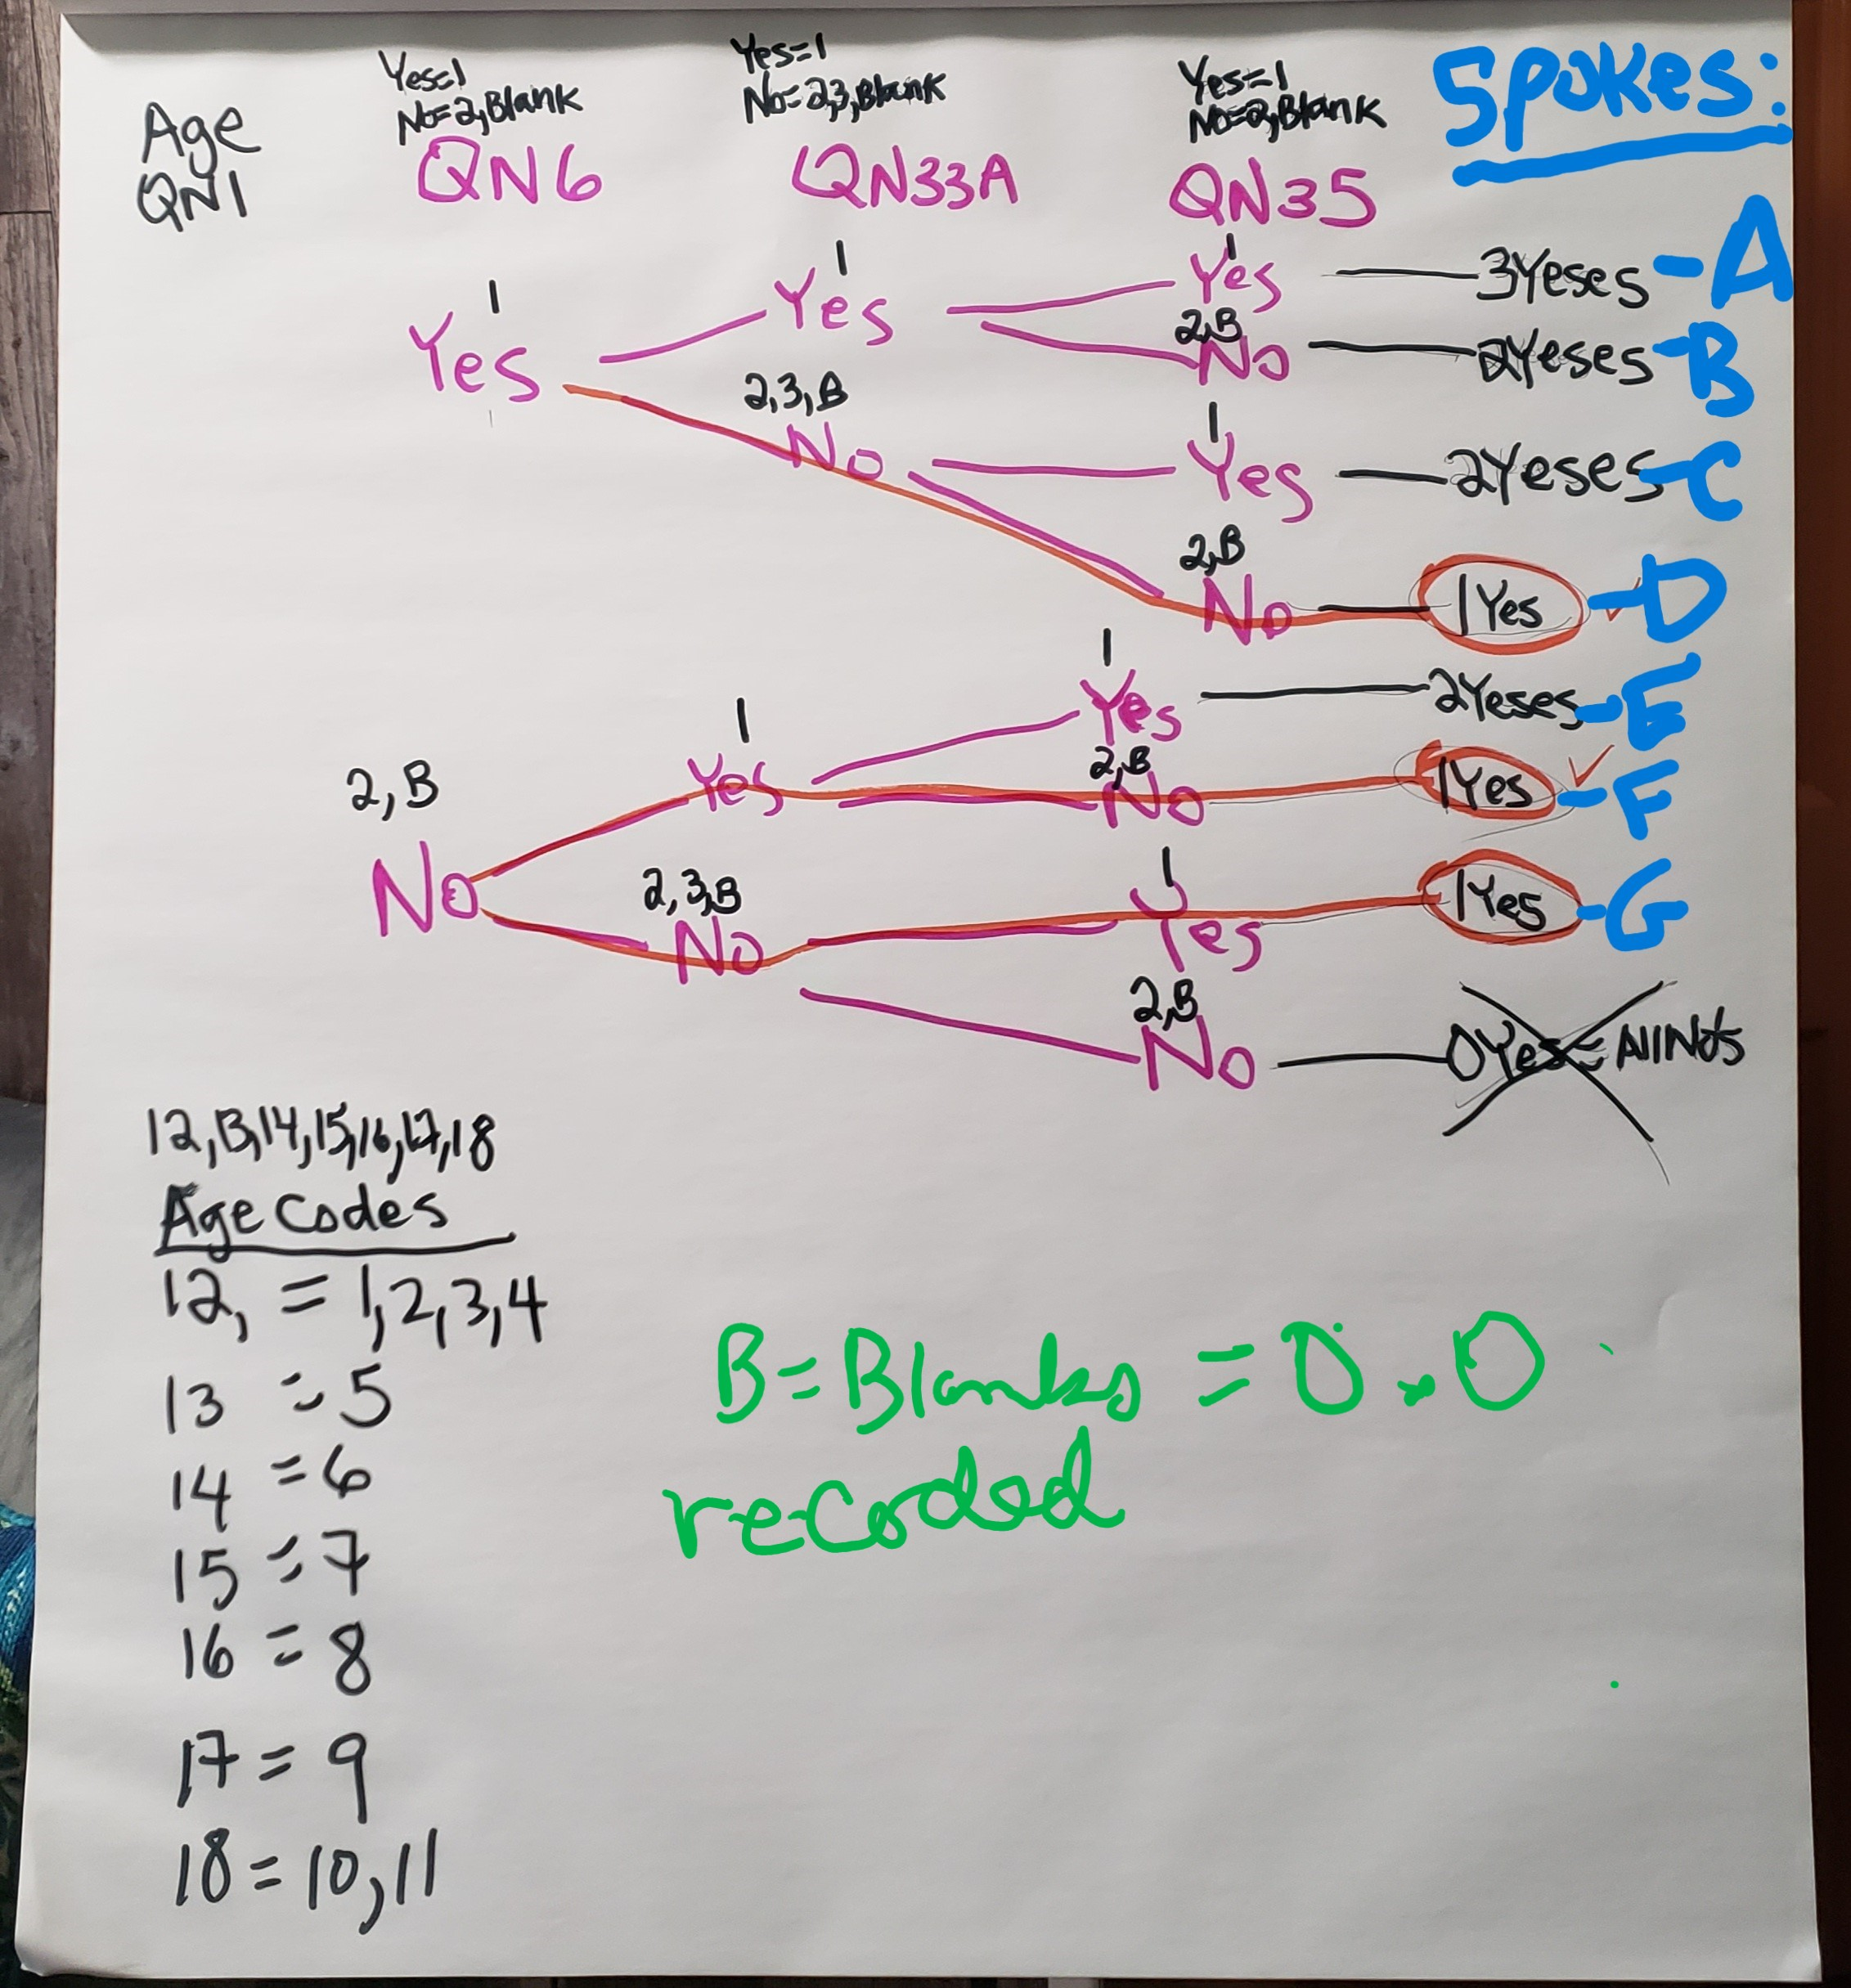

In [ ]:
#For each age, lettered spokes in the above diagram were used in the annotated codes and sections below.

In [ ]:
subset1_fillwZeros = subset1.fillna(0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
subset1

,StudentLoginID,Location,QN1,QN2,QN6,QN33A,QN35
0,153749,In a school building/classroom,4.0,2.0,2.0,2.0,2.0
1,153750,In a school building/classroom,4.0,1.0,2.0,2.0,2.0
2,153752,In a school building/classroom,4.0,2.0,2.0,2.0,2.0
3,153753,In a school building/classroom,4.0,2.0,2.0,2.0,2.0
4,153754,In a school building/classroom,4.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
20408,164198,In a school building/classroom,9.0,1.0,1.0,2.0,1.0
20409,164199,In a school building/classroom,10.0,2.0,1.0,2.0,2.0
20410,164201,In a school building/classroom,0.0,1.0,2.0,2.0,2.0
20411,164202,In a school building/classroom,10.0,1.0,2.0,2.0,1.0


In [ ]:
#=======================
# 12YO,SPOKE A - 3 YESES
#=======================
Twelve_QN63Y = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN63Y.count()

StudentLoginID    31
dtype: int64

In [ ]:
#=======================
# 12YO,SPOKE B - 2 YESES
#=======================
Twelve_QN62Ya = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Twelve_QN62Ya.count()

StudentLoginID    23
dtype: int64

In [ ]:
Twelve_QN62Yb = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Twelve_QN62Yb.count()

StudentLoginID    2
dtype: int64

In [ ]:
#=======================
# 12YO,SPOKE C - 2 YESES
#=======================
Twelve_QN62YCa = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YCa.count()

StudentLoginID    28
dtype: int64

In [ ]:
Twelve_QN62YCb = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YCb.count()

StudentLoginID    9
dtype: int64

In [ ]:
Twelve_QN62YCc = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YCc.count()

StudentLoginID    3
dtype: int64

In [ ]:
#=====================
# 12YO,SPOKE D - 1 YES
#=====================
Twelve_QN62YDa = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Twelve_QN62YDa.count()

StudentLoginID    103
dtype: int64

In [ ]:
Twelve_QN62YDb = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Twelve_QN62YDb.count()

StudentLoginID    1
dtype: int64

In [ ]:
Twelve_QN62YDc = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Twelve_QN62YDc.count()

StudentLoginID    15
dtype: int64

In [ ]:
Twelve_QN62YDd = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Twelve_QN62YDd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Twelve_QN62YDe = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Twelve_QN62YDe.count()

StudentLoginID    9
dtype: int64

In [ ]:
Twelve_QN62YDf = subset1.query('QN1 == 4.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Twelve_QN62YDf.count()

StudentLoginID    9
dtype: int64

In [ ]:
#=======================
# 12YO,SPOKE E - 2 YESES
#=======================
Twelve_QN62YEa = subset1.query('QN1 == 4.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YEa.count()

StudentLoginID    4
dtype: int64

In [ ]:
Twelve_QN62YEb = subset1.query('QN1 == 4.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YEb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 12YO,SPOKE F - 1 YES
#=====================
Twelve_QN62YFa = subset1.query('QN1 == 4.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Twelve_QN62YFa.count()

StudentLoginID    41
dtype: int64

In [ ]:
Twelve_QN62YFb = subset1.query('QN1 == 4.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Twelve_QN62YFb.count()

StudentLoginID    2
dtype: int64

In [ ]:
Twelve_QN62YFc = subset1.query('QN1 == 4.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Twelve_QN62YFc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Twelve_QN62YFd = subset1.query('QN1 == 4.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Twelve_QN62YFd.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 12YO,SPOKE G - 1 YES
#=====================
Twelve_QN62YGa = subset1.query('QN1 == 4.0').query('QN6 == 2.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YGa.count()

StudentLoginID    57
dtype: int64

In [ ]:
Twelve_QN62YGb = subset1.query('QN1 == 4.0').query('QN6 == 2.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YGb.count()

StudentLoginID    5
dtype: int64

In [ ]:
Twelve_QN62YGc = subset1.query('QN1 == 4.0').query('QN6 == 2.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YGc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Twelve_QN62YGd = subset1.query('QN1 == 4.0').query('QN6 == 0.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YGd.count()

StudentLoginID    1
dtype: int64

In [ ]:
Twelve_QN62YGe = subset1.query('QN1 == 4.0').query('QN6 == 0.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YGe.count()

StudentLoginID    0
dtype: int64

In [ ]:
Twelve_QN62YGf = subset1.query('QN1 == 4.0').query('QN6 == 0.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Twelve_QN62YGf.count()

StudentLoginID    0
dtype: int64

In [ ]:
243+69+31
# math addition
#1, 2, 3 uses for 12YO

343

In [ ]:
# END of 12YO
#=======================
# 13YO,SPOKE A - 3 YESES
#=======================
Thirteen_QN63Y = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN63Y.count()

StudentLoginID    41
dtype: int64

In [ ]:
#=======================
# 13YO,SPOKE B - 2 YESES
#=======================
Thirteen_QN62Ya = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Thirteen_QN62Ya.count()

StudentLoginID    34
dtype: int64

In [ ]:
Thirteen_QN62Yb = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Thirteen_QN62Yb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=======================
# 13YO,SPOKE C - 2 YESES
#=======================
Thirteen_QN62YCa = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YCa.count()

StudentLoginID    50
dtype: int64

In [ ]:
Thirteen_QN62YCb = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YCb.count()

StudentLoginID    8
dtype: int64

In [ ]:
Thirteen_QN62YCc = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YCc.count()

StudentLoginID    2
dtype: int64

In [ ]:
#=====================
# 13YO,SPOKE D - 1 YES
#=====================
Thirteen_QN62YDa = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Thirteen_QN62YDa.count()

StudentLoginID    127
dtype: int64

In [ ]:
Thirteen_QN62YDb = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Thirteen_QN62YDb.count()

StudentLoginID    0
dtype: int64

In [ ]:
Thirteen_QN62YDc = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Thirteen_QN62YDc.count()

StudentLoginID    16
dtype: int64

In [ ]:
Thirteen_QN62YDd = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Thirteen_QN62YDd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Thirteen_QN62YDe = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Thirteen_QN62YDe.count()

StudentLoginID    5
dtype: int64

In [ ]:
Thirteen_QN62YDf = subset1.query('QN1 == 5.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Thirteen_QN62YDf.count()

StudentLoginID    6
dtype: int64

In [ ]:
#=======================
# 13YO,SPOKE E - 2 YESES
#=======================
Thirteen_QN62YEa = subset1.query('QN1 == 5.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YEa.count()


StudentLoginID    10
dtype: int64

In [ ]:
Thirteen_QN62YEb = subset1.query('QN1 == 5.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YEb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 13YO,SPOKE F - 1 YES
#=====================
Thirteen_QN62YFa = subset1.query('QN1 == 5.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Thirteen_QN62YFa.count()


StudentLoginID    46
dtype: int64

In [ ]:
Thirteen_QN62YFb = subset1.query('QN1 == 5.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Thirteen_QN62YFb.count()

StudentLoginID    0
dtype: int64

In [ ]:
Thirteen_QN62YFc = subset1.query('QN1 == 5.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Thirteen_QN62YFc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Thirteen_QN62YFd = subset1.query('QN1 == 5.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Thirteen_QN62YFd.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 13YO,SPOKE G - 1 YES
#=====================
Thirteen_QN62YGa = subset1.query('QN1 == 5.0').query('QN6 == 2.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YGa.count()


StudentLoginID    52
dtype: int64

In [ ]:
Thirteen_QN62YGb = subset1.query('QN1 == 5.0').query('QN6 == 2.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YGb.count()

StudentLoginID    6
dtype: int64

In [ ]:
Thirteen_QN62YGc = subset1.query('QN1 == 5.0').query('QN6 == 2.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YGc.count()

StudentLoginID    2
dtype: int64

In [ ]:
Thirteen_QN62YGd = subset1.query('QN1 == 5.0').query('QN6 == 0.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YGd.count()

StudentLoginID    1
dtype: int64

In [ ]:
Thirteen_QN62YGe = subset1.query('QN1 == 5.0').query('QN6 == 0.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YGe.count()

StudentLoginID    0
dtype: int64

In [ ]:
Thirteen_QN62YGf = subset1.query('QN1 == 5.0').query('QN6 == 0.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Thirteen_QN62YGf.count()

StudentLoginID    0
dtype: int64

In [ ]:
# 261, 104, 41
# 13YO 1, 2, 3 USAGES

In [ ]:
# END 13YO
#
#=======================
# 14YO,SPOKE A - 3 YESES
#=======================
Fourteen_QN63Y = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN63Y.count()

StudentLoginID    74
dtype: int64

In [ ]:
#=======================
# 14YO,SPOKE B - 2 YESES
#=======================
Fourteen_QN62Ya = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fourteen_QN62Ya.count()

StudentLoginID    98
dtype: int64

In [ ]:
Fourteen_QN62Yb = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fourteen_QN62Yb.count()

StudentLoginID    1
dtype: int64

In [ ]:
#=======================
# 14YO,SPOKE C - 2 YESES
#=======================
Fourteen_QN62YCa = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YCa.count()

StudentLoginID    50
dtype: int64

In [ ]:
Fourteen_QN62YCb = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YCb.count()

StudentLoginID    6
dtype: int64

In [ ]:
Fourteen_QN62YCc = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YCc.count()

StudentLoginID    3
dtype: int64

In [ ]:
#=====================
# 14YO,SPOKE D - 1 YES
#=====================
Fourteen_QN62YDa = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fourteen_QN62YDa.count()

StudentLoginID    209
dtype: int64

In [ ]:
Fourteen_QN62YDb = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fourteen_QN62YDb.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fourteen_QN62YDc = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fourteen_QN62YDc.count()

StudentLoginID    15
dtype: int64

In [ ]:
Fourteen_QN62YDd = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fourteen_QN62YDd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fourteen_QN62YDe = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fourteen_QN62YDe.count()

StudentLoginID    8
dtype: int64

In [ ]:
Fourteen_QN62YDf = subset1.query('QN1 == 6.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fourteen_QN62YDf.count()

StudentLoginID    5
dtype: int64

In [ ]:
#=======================
# 14YO,SPOKE E - 2 YESES
#=======================
Fourteen_QN62YEa = subset1.query('QN1 == 6.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YEa.count()

StudentLoginID    13
dtype: int64

In [ ]:
Fourteen_QN62YEb = subset1.query('QN1 == 6.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YEb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 14O, SPOKE F - 1 YES
#=====================
Fourteen_QN62YFa = subset1.query('QN1 == 6.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fourteen_QN62YFa.count()

StudentLoginID    71
dtype: int64

In [ ]:
Fourteen_QN62YFb = subset1.query('QN1 == 6.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fourteen_QN62YFb.count()

StudentLoginID    2
dtype: int64

In [ ]:
Fourteen_QN62YFc = subset1.query('QN1 == 6.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fourteen_QN62YFc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fourteen_QN62YFd = subset1.query('QN1 == 6.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fourteen_QN62YFd.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 14YO, SPOKE G - 1 YES
#=====================
Fourteen_QN62YGa = subset1.query('QN1 == 6.0').query('QN6 == 2.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YGa.count()

StudentLoginID    52
dtype: int64

In [ ]:
Fourteen_QN62YGb = subset1.query('QN1 == 6.0').query('QN6 == 2.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YGb.count()

StudentLoginID    8
dtype: int64

In [ ]:
Fourteen_QN62YGc = subset1.query('QN1 == 6.0').query('QN6 == 2.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YGc.count()

StudentLoginID    2
dtype: int64

In [ ]:
Fourteen_QN62YGd = subset1.query('QN1 == 6.0').query('QN6 == 0.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YGd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fourteen_QN62YGe = subset1.query('QN1 == 6.0').query('QN6 == 0.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YGe.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fourteen_QN62YGf = subset1.query('QN1 == 6.0').query('QN6 == 0.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fourteen_QN62YGf.count()

StudentLoginID    0
dtype: int64

In [ ]:
# END 14YO
#========================
#=======================
# 15YO, SPOKE A - 3 YESES
#=======================
Fifteen_QN63Y = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN63Y.count()

StudentLoginID    108
dtype: int64

In [ ]:
#=======================
# 15YO,SPOKE B - 2 YESES
#=======================
Fifteen_QN62Ya = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fifteen_QN62Ya.count()

StudentLoginID    161
dtype: int64

In [ ]:
Fifteen_QN62Yb = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fifteen_QN62Yb.count()

StudentLoginID    1
dtype: int64

In [ ]:
#=======================
# 15YO,SPOKE C - 2 YESES
#=======================
Fifteen_QN62YCa = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YCa.count()

StudentLoginID    55
dtype: int64

In [ ]:
Fifteen_QN62YCb = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YCb.count()

StudentLoginID    5
dtype: int64

In [ ]:
Fifteen_QN62YCc = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YCc.count()

StudentLoginID    5
dtype: int64

In [ ]:
#=====================
# 15YO,SPOKE D - 1 YES
#=====================
Fifteen_QN62YDa = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fifteen_QN62YDa.count()

StudentLoginID    250
dtype: int64

In [ ]:
Fifteen_QN62YDb = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fifteen_QN62YDb.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fifteen_QN62YDc = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fifteen_QN62YDc.count()

StudentLoginID    22
dtype: int64

In [ ]:
Fifteen_QN62YDd = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fifteen_QN62YDd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fifteen_QN62YDe = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fifteen_QN62YDe.count()

StudentLoginID    9
dtype: int64

In [ ]:
Fifteen_QN62YDf = subset1.query('QN1 == 7.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fifteen_QN62YDf.count()

StudentLoginID    24
dtype: int64

In [ ]:
#=======================
# 15YO, SPOKE E - 2 YESES
#=======================
Fifteen_QN62YEa = subset1.query('QN1 == 7.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YEa.count()

StudentLoginID    10
dtype: int64

In [ ]:
Fifteen_QN62YEb = subset1.query('QN1 == 7.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YEb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 15YO, SPOKE F - 1 YES
#=====================
Fifteen_QN62YFa = subset1.query('QN1 == 7.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fifteen_QN62YFa.count()

StudentLoginID    88
dtype: int64

In [ ]:
Fifteen_QN62YFb = subset1.query('QN1 == 7.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fifteen_QN62YFb.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fifteen_QN62YFc = subset1.query('QN1 == 7.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Fifteen_QN62YFc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fifteen_QN62YFd = subset1.query('QN1 == 7.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Fifteen_QN62YFd.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 15YO, SPOKE G - 1 YES
#=====================
Fifteen_QN62YGa = subset1.query('QN1 == 7.0').query('QN6 == 2.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YGa.count()

StudentLoginID    41
dtype: int64

In [ ]:
Fifteen_QN62YGb = subset1.query('QN1 == 7.0').query('QN6 == 2.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YGb.count()

StudentLoginID    4
dtype: int64

In [ ]:
Fifteen_QN62YGc = subset1.query('QN1 == 7.0').query('QN6 == 2.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YGc.count()

StudentLoginID    1
dtype: int64

In [ ]:
Fifteen_QN62YGd = subset1.query('QN1 == 7.0').query('QN6 == 0.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YGd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fifteen_QN62YGe = subset1.query('QN1 == 7.0').query('QN6 == 0.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YGe.count()

StudentLoginID    0
dtype: int64

In [ ]:
Fifteen_QN62YGf = subset1.query('QN1 == 7.0').query('QN6 == 0.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Fifteen_QN62YGf.count()

StudentLoginID    0
dtype: int64

In [ ]:
# 15YO 
# 1, 2, 3 USES

In [ ]:
# END 15YO
#
#=======================
# 16YO,SPOKE A - 3 YESES
#=======================
Sixteen_QN63Y = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN63Y.count()

StudentLoginID    149
dtype: int64

In [ ]:
#=======================
# 16YO,SPOKE B - 2 YESES
#=======================
Sixteen_QN62Ya = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Sixteen_QN62Ya.count()

StudentLoginID    248
dtype: int64

In [ ]:
Sixteen_QN62Yb = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Sixteen_QN62Yb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=======================
# 16YO,SPOKE C - 2 YESES
#=======================
Sixteen_QN62YCa = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YCa.count()

StudentLoginID    61
dtype: int64

In [ ]:
Sixteen_QN62YCb = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YCb.count()

StudentLoginID    8
dtype: int64

In [ ]:
Sixteen_QN62YCc = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YCc.count()

StudentLoginID    2
dtype: int64

In [ ]:
#=====================
# 16YO,SPOKE D - 1 YES
#=====================
Sixteen_QN62YDa = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Sixteen_QN62YDa.count()

StudentLoginID    242
dtype: int64

In [ ]:
Sixteen_QN62YDb = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Sixteen_QN62YDb.count()

StudentLoginID    0
dtype: int64

In [ ]:
Sixteen_QN62YDc = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Sixteen_QN62YDc.count()

StudentLoginID    19
dtype: int64

In [ ]:
Sixteen_QN62YDd = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Sixteen_QN62YDd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Sixteen_QN62YDe = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Sixteen_QN62YDe.count()

StudentLoginID    7
dtype: int64

In [ ]:
Sixteen_QN62YDf = subset1.query('QN1 == 8.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Sixteen_QN62YDf.count()

StudentLoginID    22
dtype: int64

In [ ]:
#=======================
# 16YO, SPOKE E - 2 YESES
#=======================
Sixteen_QN62YEa = subset1.query('QN1 == 8.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YEa.count()

StudentLoginID    16
dtype: int64

In [ ]:
Sixteen_QN62YEb = subset1.query('QN1 == 8.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YEb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 16YO, SPOKE F - 1 YES
#=====================
Sixteen_QN62YFa = subset1.query('QN1 == 8.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Sixteen_QN62YFa.count()

StudentLoginID    118
dtype: int64

In [ ]:
Sixteen_QN62YFb = subset1.query('QN1 == 8.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Sixteen_QN62YFb.count()

StudentLoginID    2
dtype: int64

In [ ]:
Sixteen_QN62YFc = subset1.query('QN1 == 8.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Sixteen_QN62YFc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Sixteen_QN62YFd = subset1.query('QN1 == 8.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Sixteen_QN62YFd.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 16YO, SPOKE G - 1 YES
#=====================
Sixteen_QN62YGa = subset1.query('QN1 == 8.0').query('QN6 == 2.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YGa.count()

StudentLoginID    45
dtype: int64

In [ ]:
Sixteen_QN62YGb = subset1.query('QN1 == 8.0').query('QN6 == 2.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YGb.count()

StudentLoginID    0
dtype: int64

In [ ]:
Sixteen_QN62YGc = subset1.query('QN1 == 8.0').query('QN6 == 2.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YGc.count()

StudentLoginID    2
dtype: int64

In [ ]:
Sixteen_QN62YGd = subset1.query('QN1 == 8.0').query('QN6 == 0.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YGd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Sixteen_QN62YGe = subset1.query('QN1 == 8.0').query('QN6 == 0.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YGe.count()

StudentLoginID    0
dtype: int64

In [ ]:
Sixteen_QN62YGf = subset1.query('QN1 == 8.0').query('QN6 == 0.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Sixteen_QN62YGf.count()

StudentLoginID    0
dtype: int64

In [ ]:
# 16YO
# 1, 2, 3 

In [ ]:
# END 16YO
#
#=======================
# 17YO,SPOKE A - 3 YESES
#=======================
Seventeen_QN63Y = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN63Y.count()


StudentLoginID    184
dtype: int64

In [ ]:
#=======================
# 17YO,SPOKE B - 2 YESES
#=======================
Seventeen_QN62Ya = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Seventeen_QN62Ya.count()

StudentLoginID    267
dtype: int64

In [ ]:
Seventeen_QN62Yb = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Seventeen_QN62Yb.count()

StudentLoginID    2
dtype: int64

In [ ]:
#=======================
# 17YO,SPOKE C - 2 YESES
#=======================
Seventeen_QN62YCa = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YCa.count()

StudentLoginID    65
dtype: int64

In [ ]:
Seventeen_QN62YCb = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YCb.count()

StudentLoginID    5
dtype: int64

In [ ]:
Seventeen_QN62YCc = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YCc.count()

StudentLoginID    3
dtype: int64

In [ ]:
#=====================
# 17YO,SPOKE D - 1 YES
#=====================
Seventeen_QN62YDa = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Seventeen_QN62YDa.count()

StudentLoginID    233
dtype: int64

In [ ]:
Seventeen_QN62YDb = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Seventeen_QN62YDb.count()

StudentLoginID    1
dtype: int64

In [ ]:
Seventeen_QN62YDc = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Seventeen_QN62YDc.count()

StudentLoginID    22
dtype: int64

In [ ]:
Seventeen_QN62YDd = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Seventeen_QN62YDd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Seventeen_QN62YDe = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Seventeen_QN62YDe.count()

StudentLoginID    6
dtype: int64

In [ ]:
Seventeen_QN62YDf = subset1.query('QN1 == 9.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Seventeen_QN62YDf.count()

StudentLoginID    33
dtype: int64

In [ ]:
#=======================
# 17YO, SPOKE E - 2 YESES
#=======================
Seventeen_QN62YEa = subset1.query('QN1 == 9.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YEa.count()

StudentLoginID    17
dtype: int64

In [ ]:
Seventeen_QN62YEb = subset1.query('QN1 == 9.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YEb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 17YO, SPOKE F - 1 YES
#=====================
Seventeen_QN62YFa = subset1.query('QN1 == 9.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Seventeen_QN62YFa.count()

StudentLoginID    141
dtype: int64

In [ ]:
Seventeen_QN62YFb = subset1.query('QN1 == 9.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Seventeen_QN62YFb.count()

StudentLoginID    0
dtype: int64

In [ ]:
Seventeen_QN62YFc = subset1.query('QN1 == 9.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Seventeen_QN62YFc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Seventeen_QN62YFd = subset1.query('QN1 == 9.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Seventeen_QN62YFd.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 17YO, SPOKE G - 1 YES
#=====================
Seventeen_QN62YGa = subset1.query('QN1 == 9.0').query('QN6 == 2.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YGa.count()

StudentLoginID    33
dtype: int64

In [ ]:
Seventeen_QN62YGb = subset1.query('QN1 == 9.0').query('QN6 == 2.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YGb.count()

StudentLoginID    1
dtype: int64

In [ ]:
Seventeen_QN62YGc = subset1.query('QN1 == 9.0').query('QN6 == 2.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YGc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Seventeen_QN62YGd = subset1.query('QN1 == 9.0').query('QN6 == 0.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YGd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Seventeen_QN62YGe = subset1.query('QN1 == 9.0').query('QN6 == 0.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YGe.count()

StudentLoginID    0
dtype: int64

In [ ]:
Seventeen_QN62YGf = subset1.query('QN1 == 9.0').query('QN6 == 0.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Seventeen_QN62YGf.count()

StudentLoginID    0
dtype: int64

In [ ]:
# 17YO
# 1, 2, 3 USES

In [ ]:
# END 17YO
#
#=======================
# 18YO,SPOKE A - 3 YESES
#=======================
Eighteen_QN63Y = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN63Y.count()


StudentLoginID    110
dtype: int64

In [ ]:
#=======================
# 18YO,SPOKE B - 2 YESES
#=======================
Eighteen_QN62Ya = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Eighteen_QN62Ya.count()

StudentLoginID    141
dtype: int64

In [ ]:
Eighteen_QN62Yb = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Eighteen_QN62Yb.count()

StudentLoginID    1
dtype: int64

In [ ]:
#=======================
# 18YO,SPOKE C - 2 YESES
#=======================
Eighteen_QN62YCa = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YCa.count()

StudentLoginID    50
dtype: int64

In [ ]:
Eighteen_QN62YCb = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YCb.count()

StudentLoginID    1
dtype: int64

In [ ]:
Eighteen_QN62YCc = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YCc.count()

StudentLoginID    1
dtype: int64

In [ ]:
#=====================
# 18YO,SPOKE D - 1 YES
#=====================
Eighteen_QN62YDa = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Eighteen_QN62YDa.count()

StudentLoginID    112
dtype: int64

In [ ]:
Eighteen_QN62YDb = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 2.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Eighteen_QN62YDb.count()

StudentLoginID    1
dtype: int64

In [ ]:
Eighteen_QN62YDc = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Eighteen_QN62YDc.count()

StudentLoginID    8
dtype: int64

In [ ]:
Eighteen_QN62YDd = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 3.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Eighteen_QN62YDd.count()

StudentLoginID    1
dtype: int64

In [ ]:
Eighteen_QN62YDe = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Eighteen_QN62YDe.count()

StudentLoginID    3
dtype: int64

In [ ]:
Eighteen_QN62YDf = subset1.query('QN1 == 10.0').query('QN6 == 1.0').query('QN33A == 0.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Eighteen_QN62YDf.count()

StudentLoginID    20
dtype: int64

In [ ]:
#=======================
# 18YO, SPOKE E - 2 YESES
#=======================
Eighteen_QN62YEa = subset1.query('QN1 == 10.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YEa.count()

StudentLoginID    22
dtype: int64

In [ ]:
Eighteen_QN62YEb = subset1.query('QN1 == 10.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YEb.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 18YO, SPOKE F - 1 YES
#=====================
Eighteen_QN62YFa = subset1.query('QN1 == 10.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Eighteen_QN62YFa.count()

StudentLoginID    94
dtype: int64

In [ ]:
Eighteen_QN62YFb = subset1.query('QN1 == 10.0').query('QN6 == 2.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Eighteen_QN62YFb.count()

StudentLoginID    1
dtype: int64

In [ ]:
Eighteen_QN62YFc = subset1.query('QN1 == 10.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 2.0').filter(['StudentLoginID'])
Eighteen_QN62YFc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Eighteen_QN62YFd = subset1.query('QN1 == 10.0').query('QN6 == 0.0').query('QN33A == 1.0').query('QN35 == 0.0').filter(['StudentLoginID'])
Eighteen_QN62YFd.count()

StudentLoginID    0
dtype: int64

In [ ]:
#=====================
# 18YO, SPOKE G - 1 YES
#=====================
Eighteen_QN62YGa = subset1.query('QN1 == 10.0').query('QN6 == 2.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YGa.count()

StudentLoginID    29
dtype: int64

In [ ]:
Eighteen_QN62YGb = subset1.query('QN1 == 10.0').query('QN6 == 2.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YGb.count()

StudentLoginID    5
dtype: int64

In [ ]:
Eighteen_QN62YGc = subset1.query('QN1 == 10.0').query('QN6 == 2.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YGc.count()

StudentLoginID    0
dtype: int64

In [ ]:
Eighteen_QN62YGd = subset1.query('QN1 == 10.0').query('QN6 == 0.0').query('QN33A == 2.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YGd.count()

StudentLoginID    0
dtype: int64

In [ ]:
Eighteen_QN62YGe = subset1.query('QN1 == 10.0').query('QN6 == 0.0').query('QN33A == 3.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YGe.count()

StudentLoginID    0
dtype: int64

In [ ]:
Eighteen_QN62YGf = subset1.query('QN1 == 10.0').query('QN6 == 0.0').query('QN33A == 0.0').query('QN35 == 1.0').filter(['StudentLoginID'])
Eighteen_QN62YGf.count()

StudentLoginID    0
dtype: int64

In [ ]:
# 18YO
# 1, 2, 3 USES

In [ ]:
# Create table
from tabulate import tabulate

In [ ]:
#see above coding for the values
table	=	[['Age', '0', '1', '2', '3'],
		[12, 4020, 243, 69, 31],
		[13, 2749, 261, 104, 41],
		[14, 2344, 372, 171, 74],
    [15, 1988, 439, 237, 108],
    [16, 1540, 457, 335, 149],
    [17, 1412, 470, 359, 184],
    [18, 710, 274, 216, 110]]


print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

#No Usage: Total # Students
#•  0 used.

#Yes Usage: Total # Students
# At least 1 of 3 Types Used by a Student:
#• 1 type of product used
#• 2 types used
#• 3 types used

╒═══════╤══════╤═════╤═════╤═════╕
│   Age │    0 │   1 │   2 │   3 │
╞═══════╪══════╪═════╪═════╪═════╡
│    12 │ 4020 │ 243 │  69 │  31 │
├───────┼──────┼─────┼─────┼─────┤
│    13 │ 2749 │ 261 │ 104 │  41 │
├───────┼──────┼─────┼─────┼─────┤
│    14 │ 2344 │ 372 │ 171 │  74 │
├───────┼──────┼─────┼─────┼─────┤
│    15 │ 1988 │ 439 │ 237 │ 108 │
├───────┼──────┼─────┼─────┼─────┤
│    16 │ 1540 │ 457 │ 335 │ 149 │
├───────┼──────┼─────┼─────┼─────┤
│    17 │ 1412 │ 470 │ 359 │ 184 │
├───────┼──────┼─────┼─────┼─────┤
│    18 │  710 │ 274 │ 216 │ 110 │
╘═══════╧══════╧═════╧═════╧═════╛
